# Processamento de Imagens em Python: scikit-image

![](python-logo.png)
![](logo.png)


# O que é uma imagem?

![](pdi.png)

### Como ler uma imagem

In [71]:
#importar a funcao imread da biblioteca skimage
from skimage.io import imread

In [72]:
#ler imagem
imagem = imread('lenna.jpg')

In [73]:
imagem.shape

(220, 220, 3)

### Como mostrar uma imagem

In [74]:
#importar a biblioteca matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

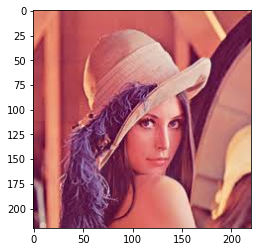

In [75]:
plt.imshow(imagem)

### Informações da Imagem

In [6]:
#dimensões
dim = imagem.shape

In [7]:
dim

(220, 220, 3)

### Trabalhando com Imagens Coloridas (RGB)
![](rgb.png)![image.png]

In [8]:
red = imagem[:,:,0]
green = imagem[:,:,1]
blue = imagem[:,:,2]

In [9]:
blue.shape

(220, 220)

### Mostrar várias imagens

Text(0.5, 1.0, 'Canal Blue do Sistema de Cores RGB')

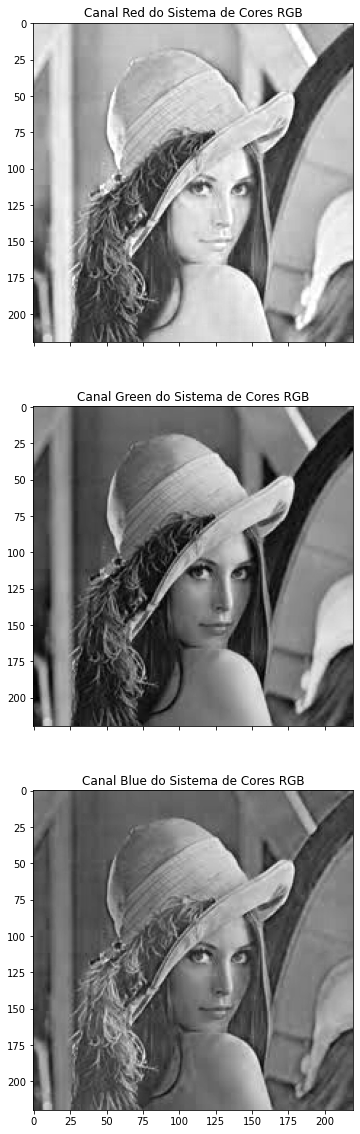

In [10]:
fig, ax = plt.subplots(3,1,figsize=(20, 20),sharex=True)
ax[0].imshow(red,cmap = 'gray')
ax[0].set_title('Canal Red do Sistema de Cores RGB')
ax[1].imshow(green,cmap = 'gray')
ax[1].set_title('Canal Green do Sistema de Cores RGB')
ax[2].imshow(blue,cmap = 'gray')
ax[2].set_title('Canal Blue do Sistema de Cores RGB')

### Níveis de cinza

$Y = 0.2125 R + 0.7154 G + 0.0721 B$

In [11]:
from skimage.color import rgb2gray

In [12]:
cinza = rgb2gray(imagem)

Text(0.5, 1.0, 'Imagens em Níveis de Cinza')

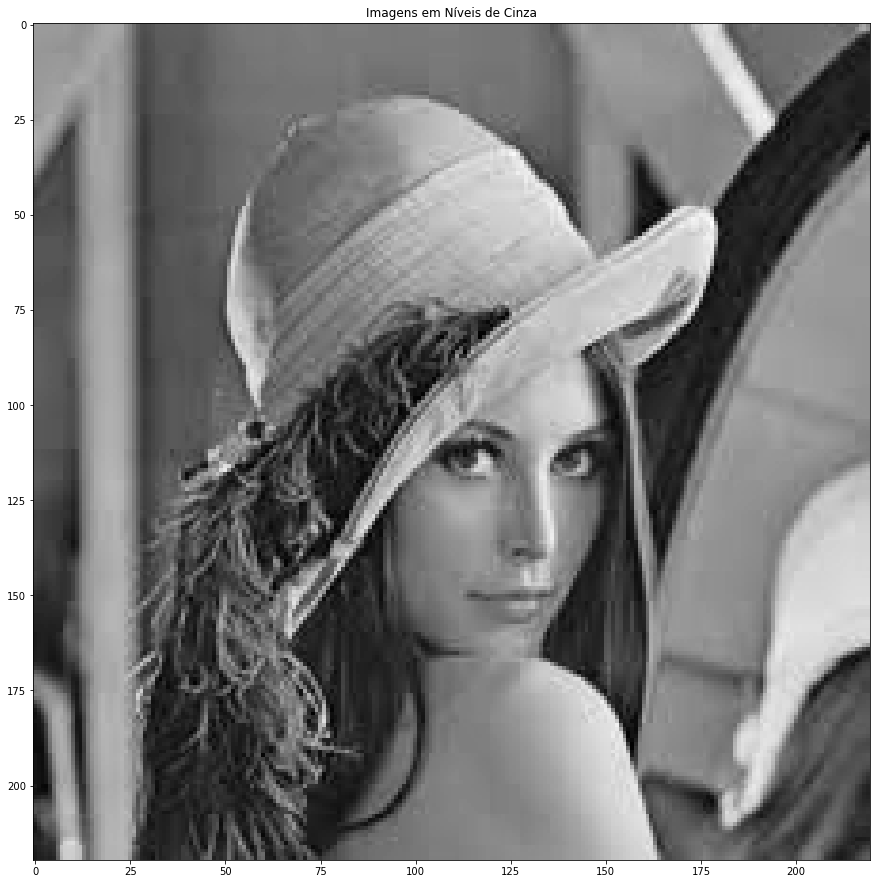

In [13]:
plt.figure(figsize=(15,30))
plt.imshow(cinza,cmap='gray')
plt.title('Imagens em Níveis de Cinza')

### Salvar resultado

In [14]:
#importar a funcao imsave da biblioteca skimage
from skimage.io import imsave
import cv2

In [15]:
imsave('aula_visao.png',cinza)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Atividade

- Leia uma imagem
- Crie variáveis para armazenar cada componente do RGB
- Salve cada imagem em disco

In [16]:
imagem = imread('imagem_teste.png')
red = imagem[:,:,0]
green = imagem[:,:,1]
blue = imagem[:,:,2]
imsave('aula_visao_red.png',red)
imsave('aula_visao_green.png',green)
imsave('aula_visao_blue.png',blue)

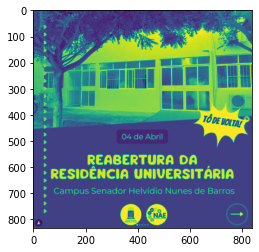

In [17]:
plt.imshow(red)

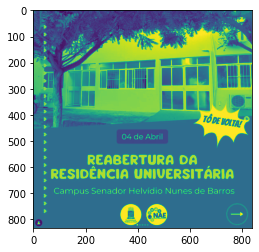

In [18]:
plt.imshow(green)

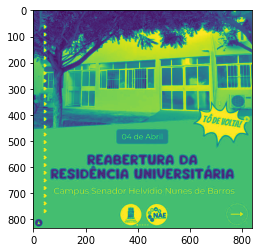

In [19]:
plt.imshow(blue)

### Remoção de Ruídos

In [20]:
#importar função com filtro da media
from skimage.restoration import denoise_nl_means

In [51]:
cinza_filter = denoise_nl_means(cinza,100)

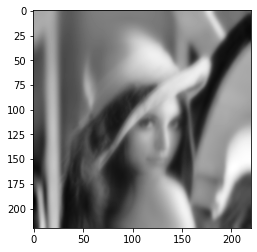

In [52]:
plt.imshow(cinza_filter,cmap = 'gray')

# Atividade: 

- Aplique o filtro da mediana em uma imagem de sua escolha com o tamanho de janela variando entre 3 e 13
- Plot os resultados e compare com a imagem original
- Analise os resultados obtidos

In [43]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

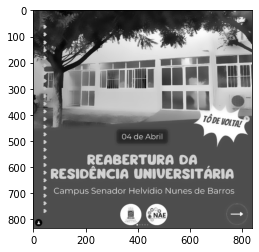

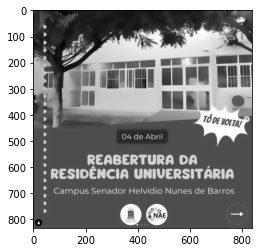

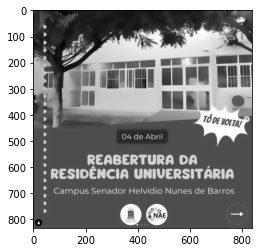

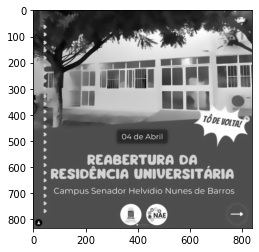

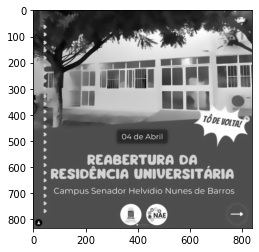

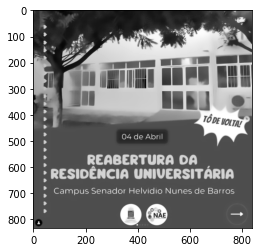

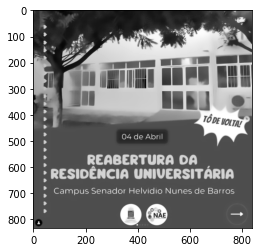

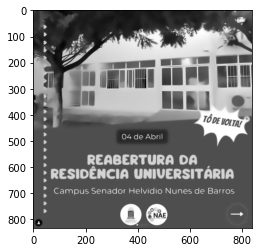

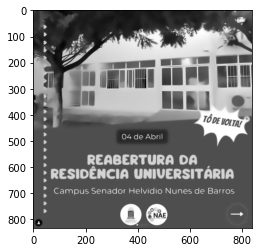

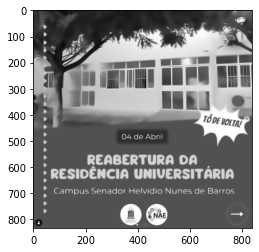

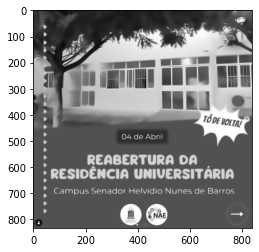

In [70]:
imagem_task2 = imread('imagem_teste.png')
imagem_task2 = rgba2rgb(imagem_task2)
cinza_task2 = rgb2gray(imagem_task2)

plt.imshow(cinza_task2,cmap = 'gray')

for x in range (3,14):
    taks_filter = denoise_nl_means(cinza_task2, patch_size=x)
    plt.imshow(taks_filter,cmap = 'gray')
    plt.show()    


### Percorendo uma imagem

In [76]:
linhas,colunas,dimensao = imagem.shape #pegar dimensoes da imagem

In [77]:
for l in range(linhas):
    for c in range(colunas):
        if (imagem[l,c,1] < 150):
            imagem[l,c,1] = 0

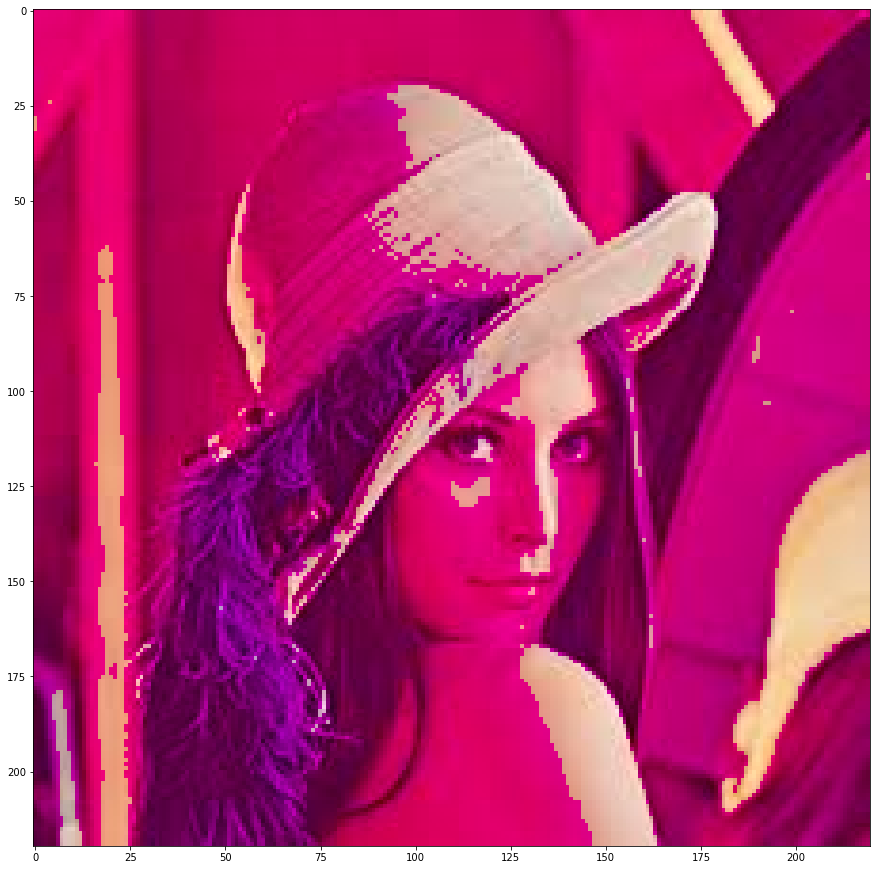

In [78]:
plt.figure(figsize=(15,30))
plt.imshow(imagem)

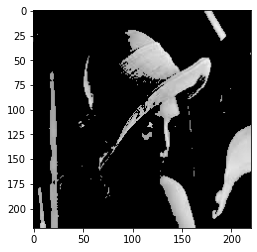

In [79]:
plt.imshow(imagem[:,:,1],cmap='gray')

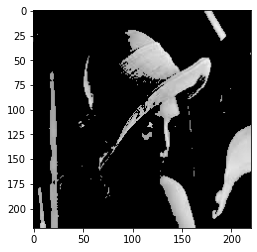

In [80]:
plt.imshow(imagem[:,:,1],cmap='gray')

## Atividade 
- Percorra sua imagem e ache o pixel com maior valor em cada uma das componentes

In [108]:
imagem_teste = imread('imagem_teste.png')
# imagem_teste = imagem

linhas,colunas,dimensao = imagem_teste.shape #pegar dimensoes da imagem
maxValueR = 0
maxValueG = 0
maxValueB = 0
for l in range(linhas):
    for c in range(colunas):            
        if (imagem_teste[l,c,0] > maxValueR):
            maxValueR = imagem_teste[l,c,0]
            
        if (imagem_teste[l,c,1] > maxValueG):
            maxValueG = imagem_teste[l,c,1]
            
        if (imagem_teste[l,c,2] > maxValueB):
            maxValueB = imagem_teste[l,c,2]
            
print("RED - {}\nGREEN - {}\nBLUE - {}".format(maxValueR, maxValueG, maxValueB))     

RED - 255
GREEN - 255
BLUE - 255


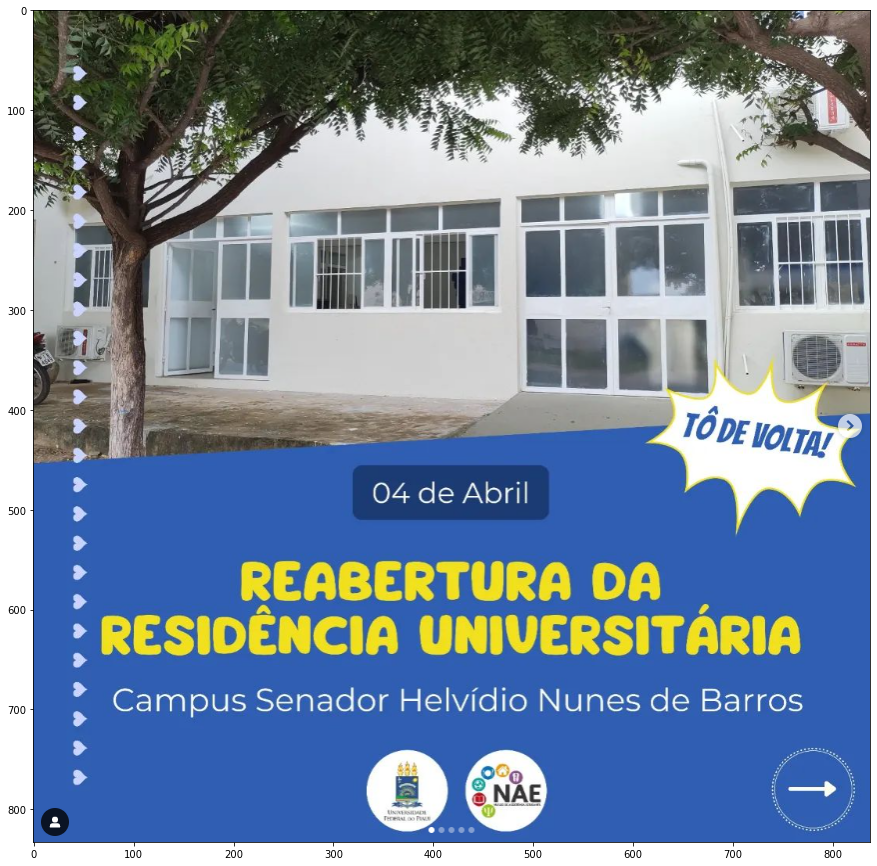

In [109]:
plt.figure(figsize=(15,30))
plt.imshow(imagem_teste)

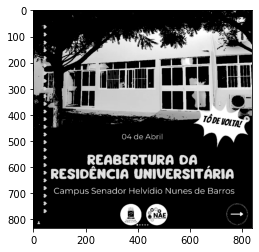

In [89]:
plt.imshow(imagem_teste[:,:,1],cmap='gray')

# Imagens Preto e Branco

In [95]:
import numpy as np
from skimage.filters import threshold_otsu

In [96]:
#método de Otsu
otsu = threshold_otsu(cinza)
preto_branco = (cinza < otsu)

In [97]:
otsu

0.4353133938419118

In [98]:
preto_branco

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

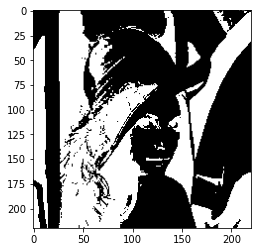

In [99]:
plt.imshow(preto_branco,cmap = 'gray')

# Atividade
- Faça uma binarização na imagem variando o limiar entre 0 e 1 com passos de 0.2
- Plot os resultados

1


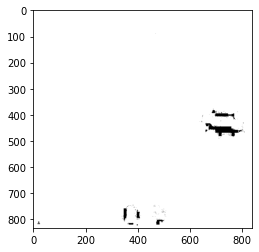

0.8


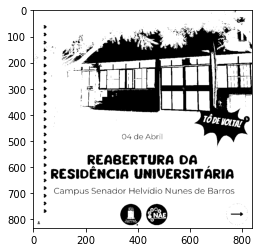

0.6000000000000001


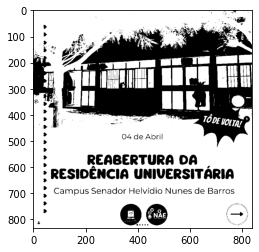

0.4000000000000001


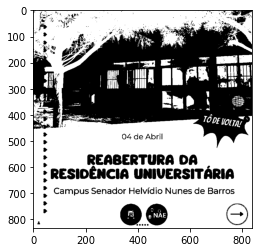

0.20000000000000007


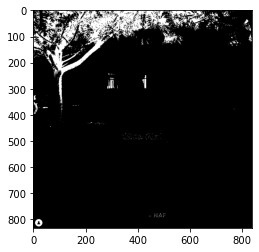

5.551115123125783e-17


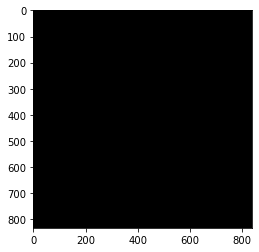

In [127]:
imagem_teste = imread('imagem_teste.png')
imagem_teste = rgba2rgb(imagem_teste)
cinza_task2 = rgb2gray(imagem_teste)

aux = 1
for x in range(6):
    print(aux)
    preto_branco = (cinza_task2 < aux)
    aux -= 0.2
    plt.imshow(preto_branco,cmap = 'gray')
    plt.show()  

### Encontrando Bordas

In [35]:
from skimage.filters import sobel,roberts,prewitt,scharr

In [36]:
contorno = sobel(preto_branco)

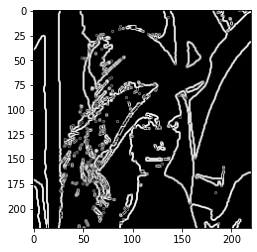

In [37]:
plt.imshow(contorno,cmap = 'gray')

## Atividade
- Transforme uma imagem para preto e branco
- Utilize outros métodos que não seja o de Sobel para encontrar as bordas. Ex: scharr, prewitt e roberts
- Faça um plot com todos os métodos que você utilizou

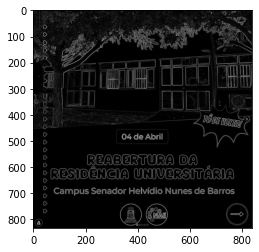

In [114]:
imagem_teste = imread('imagem_teste.png')
imagem_teste = rgba2rgb(imagem_teste)
cinza_task2 = rgb2gray(imagem_teste)

contorno_sobel = sobel(cinza_task2)
plt.imshow(contorno_sobel,cmap = 'gray')

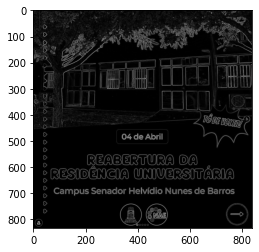

In [112]:
imagem_teste = imread('imagem_teste.png')
imagem_teste = rgba2rgb(imagem_teste)
cinza_task2 = rgb2gray(imagem_teste)

contorno_scharr = scharr(cinza_task2)
plt.imshow(contorno_scharr,cmap = 'gray')

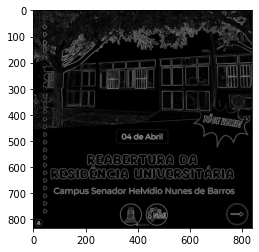

In [115]:
imagem_teste = imread('imagem_teste.png')
imagem_teste = rgba2rgb(imagem_teste)
cinza_task2 = rgb2gray(imagem_teste)

contorno_prewitt = prewitt(cinza_task2)
plt.imshow(contorno_prewitt,cmap = 'gray')

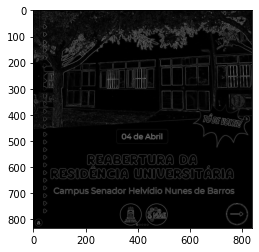

In [116]:
imagem_teste = imread('imagem_teste.png')
imagem_teste = rgba2rgb(imagem_teste)
cinza_task2 = rgb2gray(imagem_teste)

contorno_roberts = roberts(cinza_task2)
plt.imshow(contorno_roberts,cmap = 'gray')

### Recortes em Imagens

In [128]:
recorte_imagem = imagem[110:120,100:150,:]

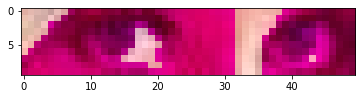

In [129]:
plt.imshow(recorte_imagem)

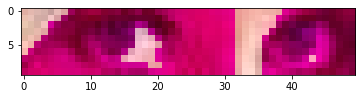

In [130]:
plt.imshow(recorte_imagem,cmap='gray')

In [131]:
recorte_imagem

array([[[224, 174, 163],
        [228, 184, 175],
        [220, 181, 174],
        ...,
        [123,   0,  49],
        [139,   0,  58],
        [141,   0,  61]],

       [[234, 191, 175],
        [234, 194, 184],
        [210, 173, 165],
        ...,
        [118,   0,  47],
        [129,   0,  55],
        [129,   0,  57]],

       [[234, 199, 177],
        [222, 187, 168],
        [214, 174, 162],
        ...,
        [101,   0,  40],
        [117,   0,  54],
        [111,   0,  52]],

       ...,

       [[188,   0, 104],
        [181,   0,  90],
        [197,   0, 102],
        ...,
        [108,   0,  37],
        [117,   0,  51],
        [118,   0,  57]],

       [[158,   0,  68],
        [195,   0,  96],
        [225,   0, 122],
        ...,
        [122,   0,  48],
        [134,   0,  65],
        [126,   0,  62]],

       [[190,   0,  93],
        [210,   0, 104],
        [213,   0, 103],
        ...,
        [143,   0,  65],
        [148,   0,  75],
        [123,   0,  57]]

### Desenhar formas geométricas

In [132]:
from skimage.draw import rectangle,rectangle_perimeter

In [133]:
start = (110, 100)
extent = (10,50)
rr, cc = rectangle_perimeter(start, extent=extent, shape=imagem.shape)
imagem[rr, cc,:] = [255,0,0]

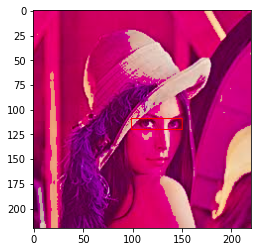

In [134]:
plt.imshow(imagem)

In [135]:
rr

array([109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109])

In [136]:
cc

array([ 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137,
       136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124,
       123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99])